In [2]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [4]:
cleansed=load_amihud_markets_price()

tsmom_model.py:161: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('./Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:163: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('./liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [5]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:44: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('./Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:46: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('./volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:48: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:48: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:51: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future ve

# Presentation to be like "Time Varying Liquidity and Momentum Profits (2015) paper

Rank by deciles, HML (8,9,10) - (1,2,3).  Save monthly returns (equal (risk?) weighted) and if you want to annualized then resample.


Then correlation matrix 
* Overall market vol?
* Market illiquidity (median Amihud through time series)


# Amihud (2002) Annual portfolio sorts

In [6]:
data=calc_zscore_expanding_window(amihud.dropna(how='all'),3).dropna(how='all')
sector_zscores={}
d_map=sector_map(amihud)
for sect in d_map.keys():
    sector_zscores[sect]=data[d_map[sect]].dropna(how='all')

tsmom_model.py:260: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=3,window=100000000,center=False).mean()
  return (df-pd.rolling_mean(df,100000000,min_periods=min_per))/pd.rolling_std(df,100000000,min_periods=min_per)
tsmom_model.py:260: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=3,window=100000000,center=False).std()
  return (df-pd.rolling_mean(df,100000000,min_periods=min_per))/pd.rolling_std(df,100000000,min_periods=min_per)


In [7]:
sector_portfolio_sorts={}
for s in sector_zscores.keys():
    sector_portfolio_sorts[s]=quantile_portfolios_annual(sector_zscores[s],cleansed,5)

tsmom_model.py:225: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  mkts=quantile_columns(rank_data.resample(rule='a',how='median'),year,number_of_buckets,i)
tsmom_model.py:226: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  rtns = price_data.resample(rule='m',how='last')[mkts].pct_change()[str(y+1)].mean(axis=1)


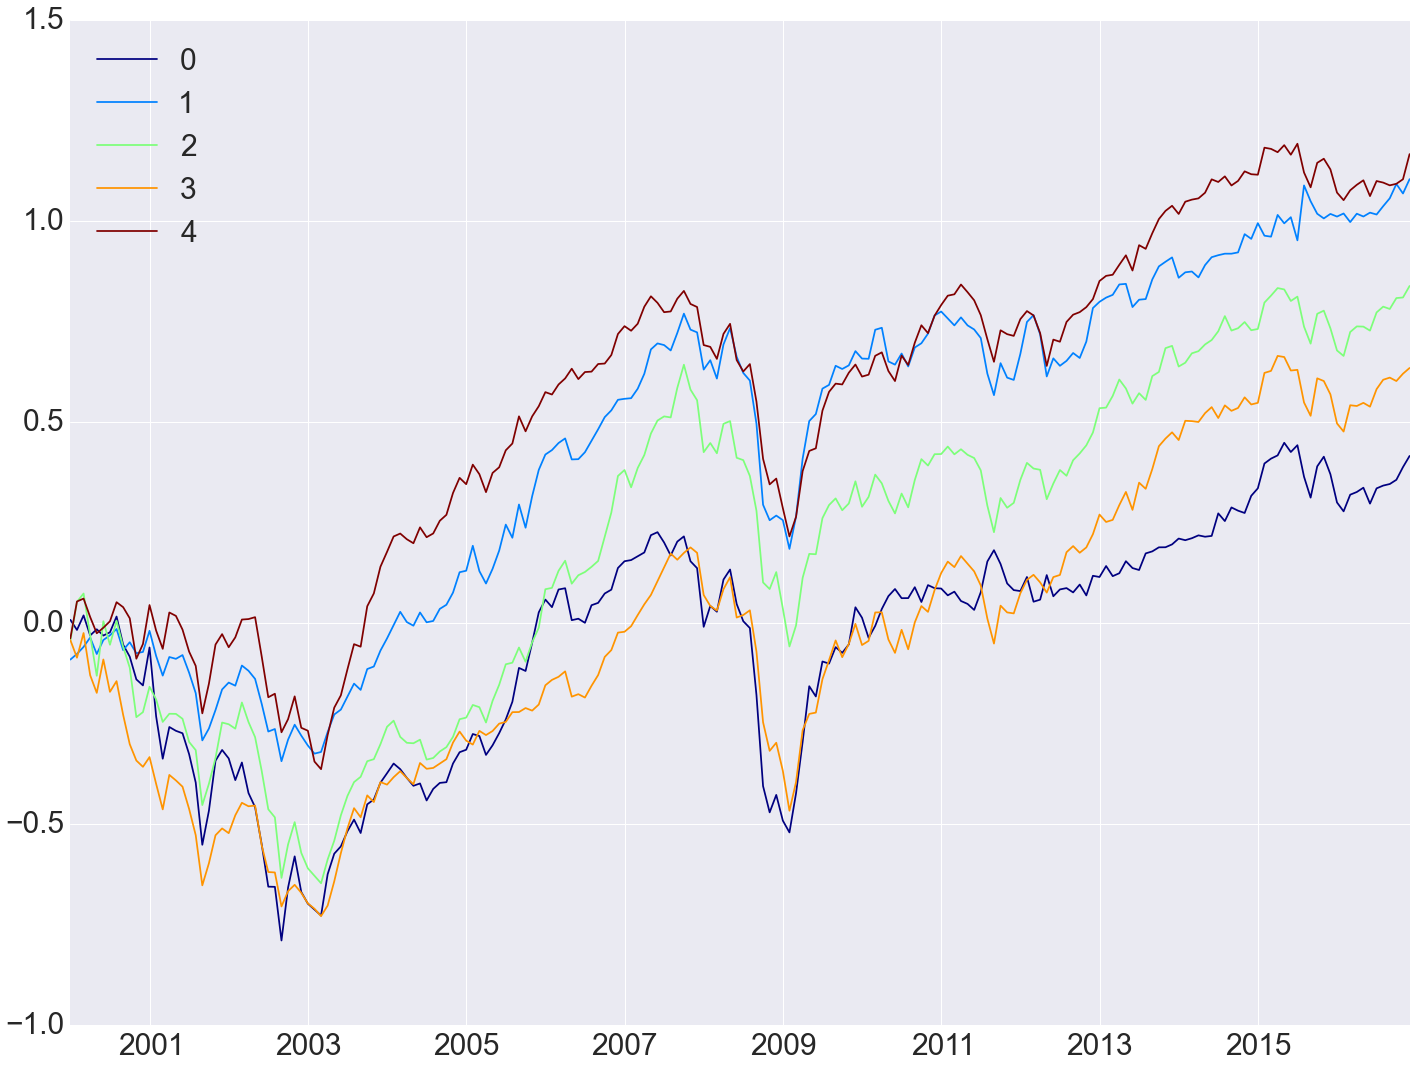

In [17]:
sector_portfolio_sorts['Equities'].cumsum().plot(colormap='jet')

In [18]:
portfolio_sort_table(sector_portfolio_sorts['Equities'])

,0,1,2,3,4
Monthly Return,0.20,0.54,0.41,0.31,0.57
Standard Deviation,18.43,15.51,17.65,15.95,15.49
Information Ratio,0.13,0.42,0.28,0.23,0.44
Skewness,-0.75,-0.60,-0.62,-0.62,-0.46
Excess Kurtosis,2.46,2.29,0.77,0.90,0.48
AR(1),0.16,0.14,0.13,0.15,0.16
AR(1) Tstat,1.66,1.46,1.79,1.87,2.38
CAPM Alpha Annualized (in %),-0.02,0.03,-0.00,-0.01,0.02
CAPM Alpha Tstat,-0.47,1.06,-0.04,-0.45,1.25
CAPM Beta (in %),0.80,0.72,0.98,0.90,0.89


In [13]:
sector_portfolio_sorts['Currencies']

,0,1,2,3,4
2000-01-31,NaN,-0.002100,NaN,-0.001156,0.033882
2000-02-29,NaN,-0.022407,NaN,-0.002603,0.009241
2000-03-31,NaN,0.009244,NaN,0.002175,-0.007268
2000-04-30,NaN,-0.025847,NaN,-0.022283,0.045926
2000-05-31,NaN,-0.035162,NaN,-0.010360,-0.011909
2000-06-30,NaN,0.013616,NaN,0.011964,-0.019413
2000-07-31,NaN,-0.011721,NaN,-0.005024,0.026178
2000-08-31,NaN,-0.033182,NaN,0.009802,0.029258
2000-09-30,NaN,0.017919,NaN,-0.020444,0.003820
2000-10-31,NaN,-0.018009,NaN,-0.013363,0.031858


In [19]:
print portfolio_sort_table(sector_portfolio_sorts['Equities']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &      0 &      1 &      2 &      3 &      4 \\
\midrule
Monthly Return               &   0.20 &   0.54 &   0.41 &   0.31 &   0.57 \\
Standard Deviation           &  18.43 &  15.51 &  17.65 &  15.95 &  15.49 \\
Information Ratio            &   0.13 &   0.42 &   0.28 &   0.23 &   0.44 \\
Skewness                     &  -0.75 &  -0.60 &  -0.62 &  -0.62 &  -0.46 \\
Excess Kurtosis              &   2.46 &   2.29 &   0.77 &   0.90 &   0.48 \\
AR(1)                        &   0.16 &   0.14 &   0.13 &   0.15 &   0.16 \\
AR(1) Tstat                  &   1.66 &   1.46 &   1.79 &   1.87 &   2.38 \\
CAPM Alpha Annualized (in \%) &  -0.02 &   0.03 &  -0.00 &  -0.01 &   0.02 \\
CAPM Alpha Tstat             &  -0.47 &   1.06 &  -0.04 &  -0.45 &   1.25 \\
CAPM Beta (in \%)             &   0.80 &   0.72 &   0.98 &   0.90 &   0.89 \\
CAPM Beta Tstat              &   7.15 &   9.73 &  21.04 &  20.57 &  24.34 \\
R\textasciicircum2                          &   0.43 &   0

# FHT Annual portfolio sorts

In [20]:
FHT=calculate_FHT(cleansed)
data=calc_zscore_expanding_window(FHT.dropna(how='all'),3).dropna(how='all')
sector_zscores={}
d_map=sector_map(FHT)
for sect in d_map.keys():
    sector_zscores[sect]=data[d_map[sect]].dropna(how='all')

tsmom_model.py:270: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  nonzero=x[x==0].resample(rule='m',how='count')
tsmom_model.py:271: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  Z=(nonzero/x.resample(rule='m',how='count')).dropna()
tsmom_model.py:272: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')
tsmom_model.py:272: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data[c]=pd.Series(norm.cdf((1+Z)/2.),index=Z.index)*2*pd.rolling_std(x,12).resample(rule='m',how='last')


In [21]:
sector_portfolio_sorts={}
for s in sector_zscores.keys():
    sector_portfolio_sorts[s]=quantile_portfolios_annual(sector_zscores[s],cleansed,5)

In [22]:
portfolio_sort_table(sector_portfolio_sorts['Equities'])

,0,1,2,3,4
Monthly Return,0.66,0.50,0.51,0.83,0.60
Standard Deviation,18.20,17.81,18.80,20.09,20.60
Information Ratio,0.44,0.34,0.33,0.49,0.35
Skewness,-0.18,-0.45,0.40,0.94,-1.30
Excess Kurtosis,1.37,1.24,6.92,8.22,9.12
AR(1),0.09,0.12,0.04,0.07,0.12
AR(1) Tstat,1.37,1.88,0.36,1.06,1.17
CAPM Alpha Annualized (in %),0.01,-0.01,-0.00,0.04,0.00
CAPM Alpha Tstat,0.41,-0.54,-0.17,1.08,0.11
CAPM Beta (in %),0.84,0.91,0.82,0.77,0.84


In [23]:
print portfolio_sort_table(sector_portfolio_sorts['Equities']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &      0 &      1 &      2 &      3 &      4 \\
\midrule
Monthly Return               &   0.66 &   0.50 &   0.51 &   0.83 &   0.60 \\
Standard Deviation           &  18.20 &  17.81 &  18.80 &  20.09 &  20.60 \\
Information Ratio            &   0.44 &   0.34 &   0.33 &   0.49 &   0.35 \\
Skewness                     &  -0.18 &  -0.45 &   0.40 &   0.94 &  -1.30 \\
Excess Kurtosis              &   1.37 &   1.24 &   6.92 &   8.22 &   9.12 \\
AR(1)                        &   0.09 &   0.12 &   0.04 &   0.07 &   0.12 \\
AR(1) Tstat                  &   1.37 &   1.88 &   0.36 &   1.06 &   1.17 \\
CAPM Alpha Annualized (in \%) &   0.01 &  -0.01 &  -0.00 &   0.04 &   0.00 \\
CAPM Alpha Tstat             &   0.41 &  -0.54 &  -0.17 &   1.08 &   0.11 \\
CAPM Beta (in \%)             &   0.84 &   0.91 &   0.82 &   0.77 &   0.84 \\
CAPM Beta Tstat              &  15.23 &  18.59 &  15.73 &  11.23 &  12.23 \\
R\textasciicircum2                          &   0.45 &   0

In [24]:
print portfolio_sort_table(sector_portfolio_sorts['Fixed Income']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &     0 &     1 &     2 &     3 &     4 \\
\midrule
Monthly Return               & -0.00 &  0.06 &  0.06 &  0.16 &  0.13 \\
Standard Deviation           &  2.45 &  2.38 &  3.14 &  3.61 &  4.77 \\
Information Ratio            & -0.01 &  0.29 &  0.22 &  0.53 &  0.31 \\
Skewness                     & -0.32 & -0.25 &  0.34 &  0.16 &  0.16 \\
Excess Kurtosis              &  4.87 &  4.78 &  6.75 &  0.78 &  1.03 \\
AR(1)                        &  0.03 &  0.13 &  0.13 &  0.13 &  0.06 \\
AR(1) Tstat                  &  0.46 &  1.92 &  1.77 &  2.06 &  0.98 \\
CAPM Alpha Annualized (in \%) &  0.00 &  0.01 &  0.01 &  0.02 &  0.02 \\
CAPM Alpha Tstat             &  0.00 &  1.19 &  1.17 &  2.69 &  1.93 \\
CAPM Beta (in \%)             & -0.00 &  0.01 & -0.02 & -0.02 & -0.05 \\
CAPM Beta Tstat              & -0.33 &  1.08 & -1.09 & -1.35 & -2.72 \\
R\textasciicircum2                          &  0.00 &  0.00 &  0.00 &  0.00 &  0.02 \\
\bottomrule
\end{tabular}



In [25]:
print portfolio_sort_table(sector_portfolio_sorts['Commodities']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &      0 &      1 &      2 &      3 &      4 \\
\midrule
Monthly Return               &   0.47 &   0.58 &   0.79 &   0.88 &   0.66 \\
Standard Deviation           &  14.81 &  14.25 &  14.48 &  16.02 &  16.14 \\
Information Ratio            &   0.38 &   0.49 &   0.66 &   0.66 &   0.49 \\
Skewness                     &  -0.27 &  -0.21 &  -0.16 &   0.62 &  -0.46 \\
Excess Kurtosis              &   3.54 &   2.38 &   0.93 &   5.96 &   2.41 \\
AR(1)                        &   0.14 &   0.07 &   0.15 &   0.08 &   0.03 \\
AR(1) Tstat                  &   1.32 &   0.90 &   2.12 &   1.23 &   0.40 \\
CAPM Alpha Annualized (in \%) &   0.04 &   0.05 &   0.07 &   0.09 &   0.06 \\
CAPM Alpha Tstat             &   1.15 &   1.55 &   2.29 &   2.62 &   1.65 \\
CAPM Beta (in \%)             &   0.20 &   0.26 &   0.27 &   0.22 &   0.28 \\
CAPM Beta Tstat              &   1.91 &   3.13 &   3.74 &   2.75 &   3.01 \\
R\textasciicircum2                          &   0.03 &   0

In [26]:
print portfolio_sort_table(sector_portfolio_sorts['Currencies']).to_latex()

ValueError: zero-size array to reduction operation maximum which has no identity

# Table 1 - Data summary and descriptive table

Explination
* Highlight how portfolios were formed.  Equally weighted and formed annually or should we do monthly?
* Mention that this is excess returns (does not include fully funded positions i.e. with cash returns)

Monthly and Annual portfolio sorts:
* AR(1) returns
* CAPM alpha's and beta's 
* All the moments

# Monthly portoflio sorts

In [27]:
data=calc_zscore_expanding_window(amihud.dropna(how='all'),3).dropna(how='all')
sector_zscores={}
d_map=sector_map(amihud)
for sect in d_map.keys():
    sector_zscores[sect]=data[d_map[sect]].dropna(how='all')

In [30]:
portfolio_sort_table(monthly_portfolio_sorts['Commodities'])

,0,1,2,3,4
Monthly Return,0.73,0.62,0.40,0.82,0.84
Standard Deviation,16.81,15.14,14.55,16.70,19.39
Information Ratio,0.52,0.49,0.33,0.59,0.52
Skewness,-0.92,0.08,-0.40,-0.31,0.62
Excess Kurtosis,4.48,0.46,0.92,3.69,5.49
AR(1),0.14,0.04,0.02,0.10,-0.01
AR(1) Tstat,1.33,0.44,0.16,1.10,-0.18
CAPM Alpha Annualized (in %),0.07,0.06,0.04,0.08,0.08
CAPM Alpha Tstat,1.57,1.61,1.00,1.89,1.82
CAPM Beta (in %),0.35,0.29,0.23,0.32,0.42


In [31]:
print portfolio_sort_table(monthly_portfolio_sorts['Equities']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &      0 &      1 &      2 &      3 &      4 \\
\midrule
Monthly Return               &   0.21 &   0.50 &   0.40 &   0.41 &   0.30 \\
Standard Deviation           &  18.74 &  17.35 &  16.39 &  16.19 &  16.39 \\
Information Ratio            &   0.14 &   0.35 &   0.29 &   0.30 &   0.22 \\
Skewness                     &  -0.61 &  -0.60 &  -0.58 &  -0.62 &  -0.61 \\
Excess Kurtosis              &   2.30 &   1.43 &   0.69 &   0.95 &   0.82 \\
AR(1)                        &   0.12 &   0.17 &   0.21 &   0.17 &   0.12 \\
AR(1) Tstat                  &   1.30 &   2.19 &   2.86 &   2.17 &   1.35 \\
CAPM Alpha Annualized (in \%) &  -0.01 &   0.02 &   0.01 &   0.01 &  -0.01 \\
CAPM Alpha Tstat             &  -0.28 &   0.79 &   0.33 &   0.34 &  -0.27 \\
CAPM Beta (in \%)             &   0.79 &   0.92 &   0.87 &   0.94 &   0.92 \\
CAPM Beta Tstat              &   7.74 &  17.22 &  18.92 &  19.51 &  19.77 \\
R\textasciicircum2                          &   0.43 &   0

In [32]:
print portfolio_sort_table(monthly_portfolio_sorts['Fixed Income']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &     0 &     1 &     2 &     3 &     4 \\
\midrule
Monthly Return               &  0.13 &  0.10 &  0.05 &  0.13 &  0.13 \\
Standard Deviation           &  4.00 &  3.58 &  2.59 &  3.00 &  3.50 \\
Information Ratio            &  0.40 &  0.32 &  0.23 &  0.52 &  0.43 \\
Skewness                     &  0.20 &  1.13 &  0.53 &  0.16 &  0.73 \\
Excess Kurtosis              &  1.36 &  9.32 &  3.88 &  3.03 &  2.39 \\
AR(1)                        & -0.12 &  0.04 & -0.00 &  0.06 &  0.09 \\
AR(1) Tstat                  & -1.91 &  0.60 & -0.03 &  0.62 &  1.28 \\
CAPM Alpha Annualized (in \%) &  0.01 &  0.01 &  0.01 &  0.02 &  0.02 \\
CAPM Alpha Tstat             &  1.58 &  1.48 &  1.35 &  2.37 &  2.11 \\
CAPM Beta (in \%)             &  0.02 & -0.04 & -0.05 & -0.05 & -0.07 \\
CAPM Beta Tstat              &  0.98 & -2.08 & -4.26 & -3.23 & -3.94 \\
R\textasciicircum2                          &  0.00 &  0.02 &  0.07 &  0.07 &  0.09 \\
\bottomrule
\end{tabular}



In [33]:
print portfolio_sort_table(monthly_portfolio_sorts['Commodities']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &      0 &      1 &      2 &      3 &      4 \\
\midrule
Monthly Return               &   0.73 &   0.62 &   0.40 &   0.82 &   0.84 \\
Standard Deviation           &  16.81 &  15.14 &  14.55 &  16.70 &  19.39 \\
Information Ratio            &   0.52 &   0.49 &   0.33 &   0.59 &   0.52 \\
Skewness                     &  -0.92 &   0.08 &  -0.40 &  -0.31 &   0.62 \\
Excess Kurtosis              &   4.48 &   0.46 &   0.92 &   3.69 &   5.49 \\
AR(1)                        &   0.14 &   0.04 &   0.02 &   0.10 &  -0.01 \\
AR(1) Tstat                  &   1.33 &   0.44 &   0.16 &   1.10 &  -0.18 \\
CAPM Alpha Annualized (in \%) &   0.07 &   0.06 &   0.04 &   0.08 &   0.08 \\
CAPM Alpha Tstat             &   1.57 &   1.61 &   1.00 &   1.89 &   1.82 \\
CAPM Beta (in \%)             &   0.35 &   0.29 &   0.23 &   0.32 &   0.42 \\
CAPM Beta Tstat              &   2.58 &   3.44 &   2.39 &   2.70 &   3.72 \\
R\textasciicircum2                          &   0.10 &   0

In [34]:
print portfolio_sort_table(monthly_portfolio_sorts['Currencies']).to_latex()

ValueError: zero-size array to reduction operation maximum which has no identity

# FHT method

In [35]:
data=calc_zscore_expanding_window(FHT.dropna(how='all'),3).dropna(how='all')
sector_zscores={}
d_map=sector_map(FHT)
for sect in d_map.keys():
    sector_zscores[sect]=data[d_map[sect]].dropna(how='all')

In [36]:
# below is pre run data
monthly_portfolio_sorts_FHT=read_monthly(amihud=False)
#monthly_portfolio_sorts_FHT={}
#for s in sector_zscores.keys():
#    monthly_portfolio_sorts_FHT[s]=quantile_portfolios_monthly(sector_zscores[s],cleansed,5)

In [ ]:
monthly_portfolio_sorts_FHT=read_monthly(amihud=False)

In [37]:
portfolio_sort_table(monthly_portfolio_sorts_FHT['Equities'])

,0,1,2,3,4
Monthly Return,0.85,0.55,0.81,0.58,1.00
Standard Deviation,28.99,19.32,19.53,19.01,20.19
Information Ratio,0.35,0.34,0.50,0.36,0.59
Skewness,7.40,0.70,1.03,-0.43,1.47
Excess Kurtosis,99.04,5.36,8.43,2.96,12.68
AR(1),0.07,0.01,0.04,0.06,0.08
AR(1) Tstat,1.38,0.11,0.63,1.08,1.17
CAPM Alpha Annualized (in %),0.03,-0.00,0.02,-0.01,0.06
CAPM Alpha Tstat,0.56,-0.05,0.84,-0.20,1.74
CAPM Beta (in %),0.89,0.83,0.92,0.91,0.70


In [42]:
print portfolio_sort_table(monthly_portfolio_sorts_FHT['Equities']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &      0 &      1 &      2 &      3 &      4 \\
\midrule
Monthly Return               &   0.85 &   0.55 &   0.81 &   0.58 &   1.00 \\
Standard Deviation           &  28.99 &  19.32 &  19.53 &  19.01 &  20.19 \\
Information Ratio            &   0.35 &   0.34 &   0.50 &   0.36 &   0.59 \\
Skewness                     &   7.40 &   0.70 &   1.03 &  -0.43 &   1.47 \\
Excess Kurtosis              &  99.04 &   5.36 &   8.43 &   2.96 &  12.68 \\
AR(1)                        &   0.07 &   0.01 &   0.04 &   0.06 &   0.08 \\
AR(1) Tstat                  &   1.38 &   0.11 &   0.63 &   1.08 &   1.17 \\
CAPM Alpha Annualized (in \%) &   0.03 &  -0.00 &   0.02 &  -0.01 &   0.06 \\
CAPM Alpha Tstat             &   0.56 &  -0.05 &   0.84 &  -0.20 &   1.74 \\
CAPM Beta (in \%)             &   0.89 &   0.83 &   0.92 &   0.91 &   0.70 \\
CAPM Beta Tstat              &  13.11 &  13.37 &  20.83 &  19.67 &   9.93 \\
R\textasciicircum2                          &   0.20 &   0

In [43]:
print portfolio_sort_table(monthly_portfolio_sorts_FHT['Fixed Income']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &     0 &     1 &     2 &     3 &     4 \\
\midrule
Monthly Return               &  0.12 &  0.04 &  0.08 & -0.00 &  0.12 \\
Standard Deviation           &  2.53 &  2.47 &  3.30 &  3.72 &  4.47 \\
Information Ratio            &  0.56 &  0.20 &  0.30 & -0.01 &  0.31 \\
Skewness                     &  0.47 & -0.02 &  0.57 & -0.43 &  0.02 \\
Excess Kurtosis              &  3.67 &  2.25 &  3.68 &  1.48 &  1.17 \\
AR(1)                        &  0.20 &  0.11 &  0.14 &  0.03 &  0.09 \\
AR(1) Tstat                  &  3.44 &  2.09 &  1.91 &  0.54 &  1.40 \\
CAPM Alpha Annualized (in \%) &  0.01 &  0.01 &  0.01 &  0.00 &  0.02 \\
CAPM Alpha Tstat             &  2.65 &  0.94 &  1.46 &  0.13 &  1.83 \\
CAPM Beta (in \%)             & -0.01 & -0.00 & -0.01 & -0.02 & -0.05 \\
CAPM Beta Tstat              & -0.80 & -0.07 & -0.59 & -1.19 & -2.31 \\
R\textasciicircum2                          &  0.00 &  0.00 &  0.00 &  0.00 &  0.02 \\
\bottomrule
\end{tabular}



In [44]:
print portfolio_sort_table(monthly_portfolio_sorts_FHT['Commodities']).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &      0 &      1 &      2 &      3 &      4 \\
\midrule
Monthly Return               &   0.90 &   0.65 &   0.57 &   0.67 &   0.44 \\
Standard Deviation           &  13.72 &  13.78 &  13.64 &  14.72 &  18.02 \\
Information Ratio            &   0.78 &   0.56 &   0.50 &   0.55 &   0.29 \\
Skewness                     &   0.03 &   0.15 &  -0.32 &  -0.54 &   0.56 \\
Excess Kurtosis              &   1.32 &   2.14 &   2.00 &   2.83 &   5.40 \\
AR(1)                        &   0.15 &   0.04 &   0.14 &   0.03 &  -0.05 \\
AR(1) Tstat                  &   2.10 &   0.56 &   2.11 &   0.30 &  -0.62 \\
CAPM Alpha Annualized (in \%) &   0.09 &   0.07 &   0.05 &   0.05 &   0.03 \\
CAPM Alpha Tstat             &   3.00 &   2.13 &   1.56 &   1.68 &   0.80 \\
CAPM Beta (in \%)             &   0.21 &   0.15 &   0.24 &   0.33 &   0.29 \\
CAPM Beta Tstat              &   2.87 &   1.85 &   2.94 &   3.59 &   2.96 \\
R\textasciicircum2                          &   0.05 &   0

In [45]:
print portfolio_sort_table(monthly_portfolio_sorts_FHT['Currencies']).to_latex()

ValueError: zero-size array to reduction operation maximum which has no identity

# Writing to pickel

In [53]:
for s in d_map.keys():
    monthly_portfolio_sorts[s].to_pickle('data/'+s+'_monthly.pickle')

In [52]:
for s in d_map.keys():
    monthly_portfolio_sorts_FHT[s].to_pickle('data/'+s+'_monthly_FHT.pickle')